<a href="https://colab.research.google.com/github/disharanganath21/Lung-Cancer-Recurrence-Prediction/blob/main/ommrlc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

clinical_data=pd.read_csv("/content/drive/MyDrive/clinical.csv")

print(clinical_data)

#features in the dataset
clinical_data.columns

#no of rows in the dataset
clinical_data.index

#information about each feature
clinical_data.info()

clinical_data["Smoking status"].value_counts()

clinical_data["Gender"].value_counts()

clinical_data["Recurrence"].value_counts()
#replacing Not checked with No
clinical_data["Recurrence"]=clinical_data["Recurrence"].replace("Not collected","no")
clinical_data["Recurrence"].value_counts()

clinical_data["Survival Status"].value_counts()

clinical_data["Radiation"].value_counts()
#replacing Not checked with No
clinical_data["Radiation"]=clinical_data["Radiation"].replace("Not Collected","No")
clinical_data["Radiation"].value_counts()

clinical_data["Chemotherapy"].value_counts()
#replacing Not checked with No
clinical_data["Chemotherapy"]=clinical_data["Chemotherapy"].replace("Not Collected","No")
clinical_data["Chemotherapy"].value_counts()

#EGFR mutation status
clinical_data["EGFR mutation status"].value_counts()
#replacing Not checked with No
clinical_data["EGFR mutation status"]=clinical_data["EGFR mutation status"].replace("Not collected","Wildtype")
clinical_data["EGFR mutation status"]=clinical_data["EGFR mutation status"].replace("Unknown","Wildtype")
clinical_data["EGFR mutation status"].value_counts()

#KRAS mutation status
clinical_data["KRAS mutation status"].value_counts()
#replacing Not checked with No
clinical_data["KRAS mutation status"]=clinical_data["KRAS mutation status"].replace("Not collected","Wildtype")
clinical_data["KRAS mutation status"]=clinical_data["KRAS mutation status"].replace("Unknown","Wildtype")
clinical_data["KRAS mutation status"].value_counts()

#ALK translocation status
clinical_data["ALK translocation status"].value_counts()
#replacing Not checked with No
clinical_data["ALK translocation status"]=clinical_data["ALK translocation status"].replace("Not collected","Wildtype")
clinical_data["ALK translocation status"]=clinical_data["ALK translocation status"].replace("Unknown","Wildtype")
clinical_data["ALK translocation status"].value_counts()

#Histology
clinical_data["Histology "].value_counts()
clinical_data["Histology "]=clinical_data["Histology "].replace("NSCLC NOS (not otherwise specified)","Adenocarcinoma")
clinical_data["Histology "].value_counts()

# Data Preprocessing

#Smoking Status
# Define the mapping
smoking_status_mapping = {'Nonsmoker': 0, 'Former': 1, 'Current': 2}

# Apply the mapping to the 'Smoking status' column
clinical_data['Smoking status'] = clinical_data['Smoking status'].map(smoking_status_mapping)

#Recurrence
# label_encoder object knows

label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Recurrence']= label_encoder.fit_transform(clinical_data['Recurrence'])

#Raditaion
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Radiation']= label_encoder.fit_transform(clinical_data['Radiation'])

#Gender
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Gender']= label_encoder.fit_transform(clinical_data['Gender'])

#survival status
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Survival Status']= label_encoder.fit_transform(clinical_data['Survival Status'])

#chemotherapy
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Chemotherapy']= label_encoder.fit_transform(clinical_data['Chemotherapy'])

#Histology
# label_encoder object knows
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
clinical_data['Histology ']= label_encoder.fit_transform(clinical_data['Histology '])

clinical_data

one_hot_encoded_data = pd.get_dummies(clinical_data, columns = ['EGFR mutation status','KRAS mutation status','ALK translocation status'])
print(one_hot_encoded_data.head(2))

one_hot_encoded_data.columns

X_data=one_hot_encoded_data.loc[:,['Age at Histological Diagnosis','Gender','Smoking status','Histology ','EGFR mutation status_Mutant', 'EGFR mutation status_Wildtype','KRAS mutation status_Mutant', 'KRAS mutation status_Wildtype',
       'ALK translocation status_Translocated',
       'ALK translocation status_Wildtype','Chemotherapy', 'Radiation', 'Survival Status']]
Y_label=one_hot_encoded_data.loc[:,["Recurrence"]]


#splitting dataset into train and test


xtrain,xtest,ytrain,ytest=train_test_split(X_data,Y_label,test_size=0.2)
ytrain = ytrain[:83]
ytest = ytest[:19]
xtrain.shape


xtest.shape

ytrain.shape

ytest.shape
print(xtrain.shape)
print(ytrain.shape)




     Case ID Patient affiliation  Age at Histological Diagnosis  \
0    AMC-001            Stanford                             34   
1    AMC-002            Stanford                             33   
2    AMC-003            Stanford                             69   
3    AMC-004            Stanford                             80   
4    AMC-005            Stanford                             76   
..       ...                 ...                            ...   
206  R01-159            Stanford                             75   
207  R01-160                  VA                             61   
208  R01-161            Stanford                             52   
209  R01-162            Stanford                             67   
210  R01-163                  VA                             68   

      Weight (lbs)  Gender                 Ethnicity Smoking status  \
0    Not Collected    Male  Not Recorded In Database      Nonsmoker   
1    Not Collected  Female  Not Recorded In Database 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-1117629491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clinical_data.select_dtypes(include=['number']),kde=True)


<Axes: ylabel='Density'>

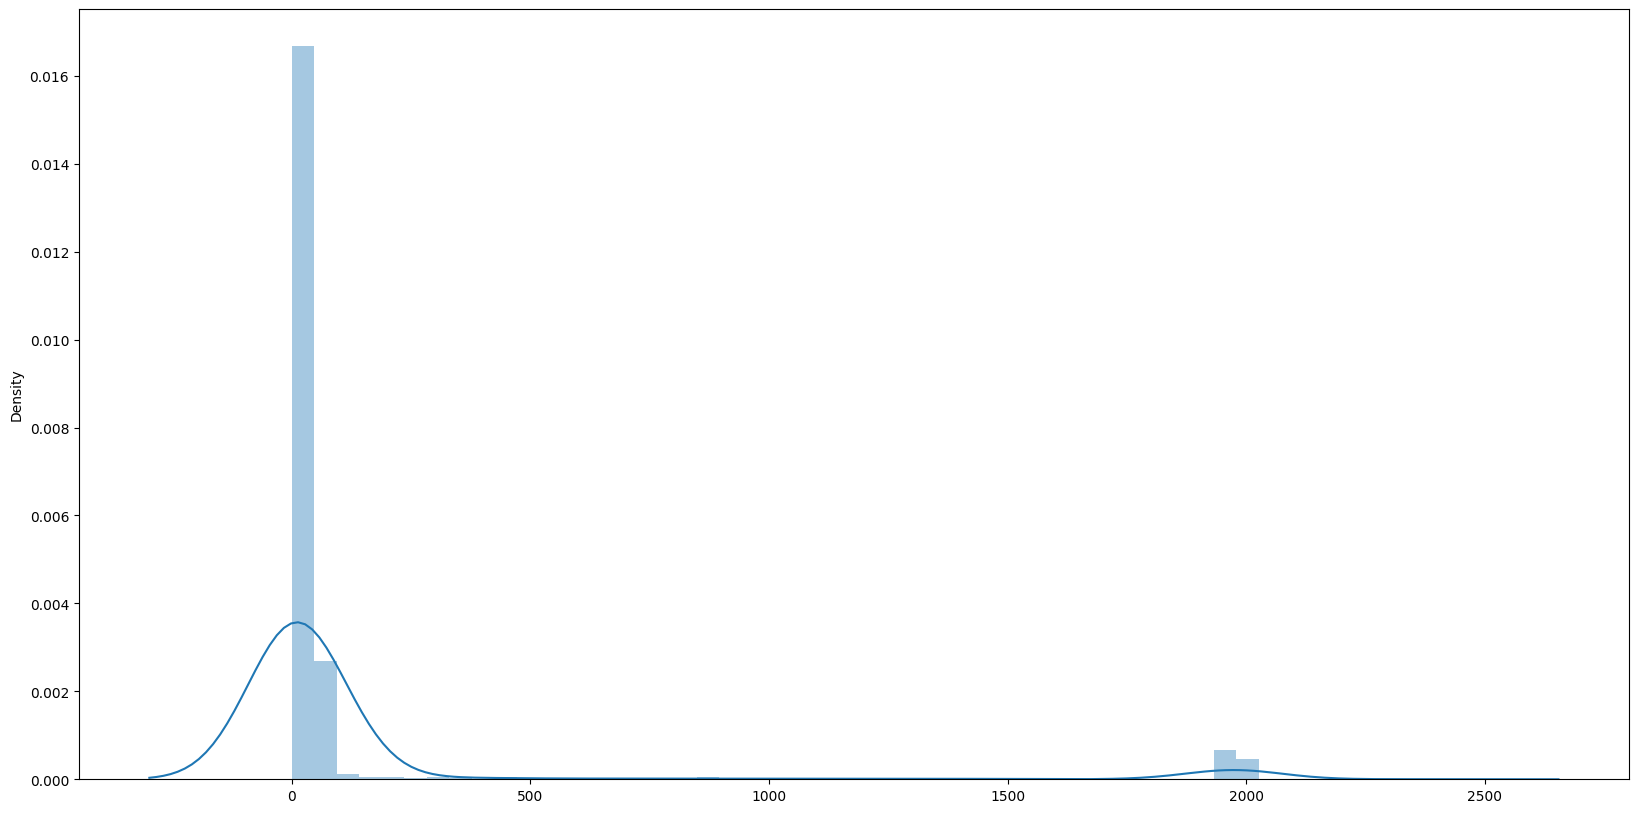

In [9]:
plt.figure(figsize = (20, 10))
sns.distplot(clinical_data.select_dtypes(include=['number']),kde=True)


<Axes: >

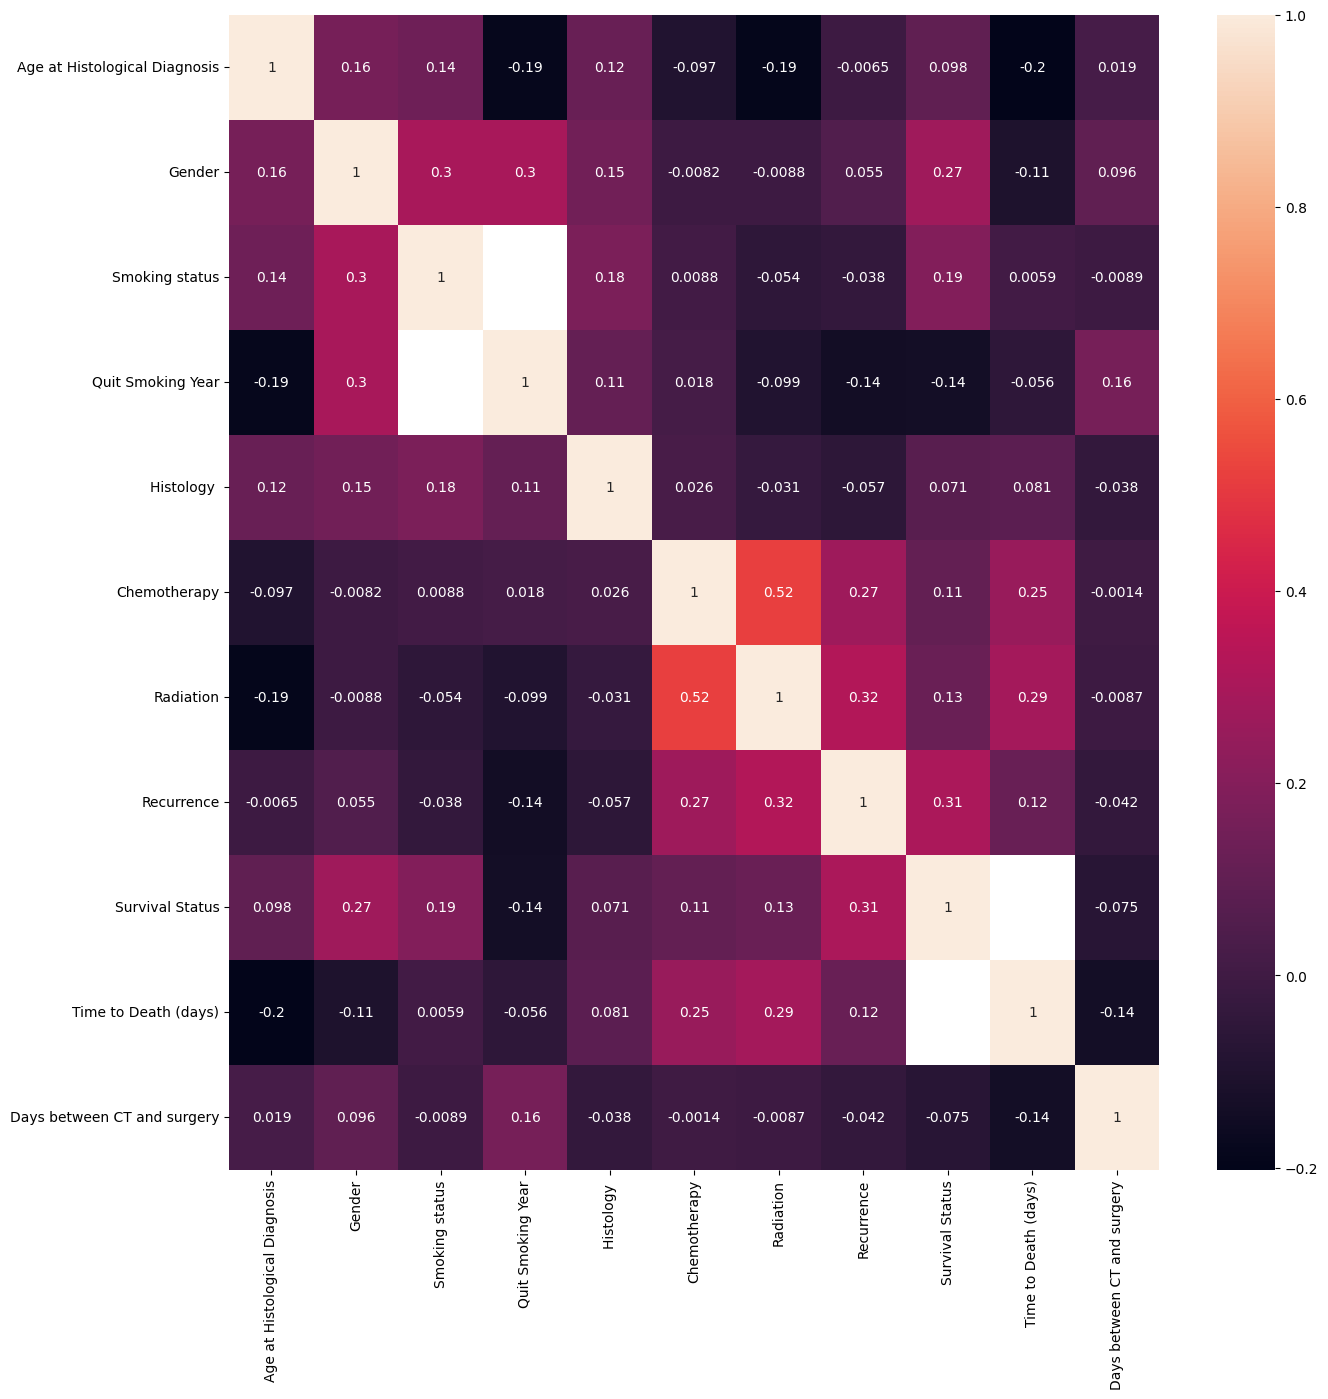

In [10]:
plt.figure(figsize=(15,15))
cm = clinical_data.select_dtypes(include=['number']).corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

Logistic Regression Test Accuracy: 0.78%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


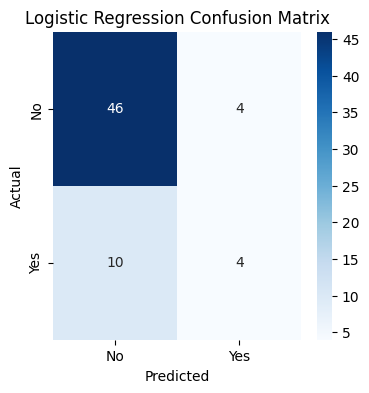

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        50
           1       0.50      0.29      0.36        14

    accuracy                           0.78        64
   macro avg       0.66      0.60      0.62        64
weighted avg       0.75      0.78      0.76        64



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Split data without manual slicing to keep consistent sizes
xtrain, xtest, ytrain, ytest = train_test_split(X_data, Y_label, test_size=0.30, random_state=42)

# Initialize logistic regression model
#clf = LogisticRegression(max_iter=1000, random_state=42)
clf = LogisticRegression()

# Fit model on training set (flatten ytrain to 1D array)
clf.fit(xtrain, ytrain)

# Predict on test set
y_pred = clf.predict(xtest)
#print(y_pred)
#clf.predict_proba(xtest)

# Calculate and print accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Logistic Regression Test Accuracy: {accuracy:.2f}%")
cm=confusion_matrix(ytest,y_pred)
#print(cm)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
# Print detailed classification report
print("Classification Report:")
print(classification_report(ytest, y_pred))





/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Logistic Regression Test Accuracy: 0.7812
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        56
           1       0.29      0.50      0.36         8

    accuracy                           0.78        64
   macro avg       0.60      0.66      0.62        64
weighted avg       0.84      0.78      0.80        64



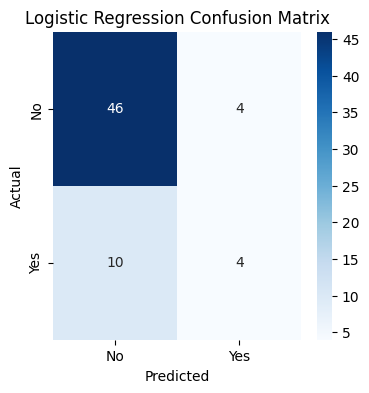

In [12]:
# Build and train optimized logistic regression model
logreg = LogisticRegression()
penalty=['l2']#'l2','elasticnet']           # Regularization for generalization
C=[1.0]#[100,10,1.0,0.1,0.01]                  # Regularization strength (lower = stronger)
solver=['lbfgs']#['newton-cg','lbfgs','liblinear','sag','saga']     # Good for small/medium datasets and binary

paramas=dict(penalty=penalty,C=C,solver=solver)
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=logreg,param_grid=paramas,scoring='accuracy',cv=cv)
grid.fit(xtrain,ytrain)
grid.best_params_
grid.best_score_
grid.predict(xtest)


# Evaluate model
y_pred = grid.predict(xtest)
test_accuracy = accuracy_score(ytest, y_pred)
print(f"Logistic Regression Test Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report( y_pred,ytest))

# Confusion matrix
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

KNN Test Accuracy: 0.77


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


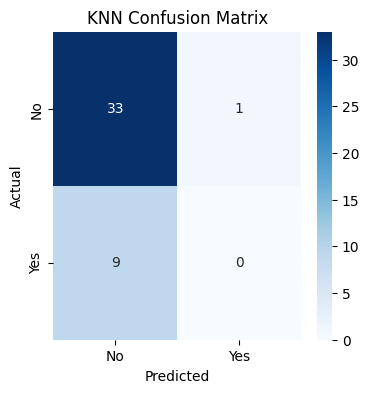

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        34
           1       0.00      0.00      0.00         9

    accuracy                           0.77        43
   macro avg       0.39      0.49      0.43        43
weighted avg       0.62      0.77      0.69        43



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split data without manual slicing to keep consistent sizes
xtrain, xtest, ytrain, ytest = train_test_split(X_data, Y_label, test_size=0.20, random_state=42)

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit model on training set
knn.fit(xtrain, ytrain)

# Predict on test set
y_pred_knn = knn.predict(xtest)

# Calculate and print accuracy
accuracy_knn = accuracy_score(ytest, y_pred_knn)
print(f"KNN Test Accuracy: {accuracy_knn:.2f}")

# Confusion matrix
cm_knn = confusion_matrix(ytest, y_pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("KNN Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Print detailed classification report
print("Classification Report for KNN:")
print(classification_report(ytest, y_pred_knn))


/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best optimized KNN params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best CV accuracy: 0.7418390804597701
Optimized KNN Test Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        50
           1       0.67      0.29      0.40        14

    accuracy                           0.81        64
   macro avg       0.75      0.62      0.64        64
weighted avg       0.79      0.81      0.78        64



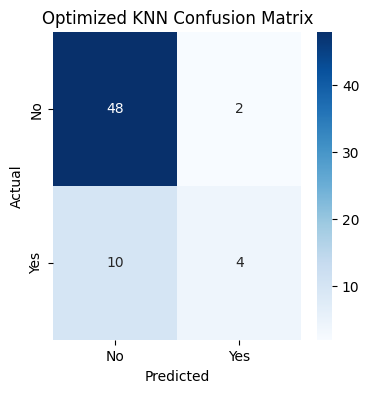

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

# Optional: Dimensionality reduction with PCA (adjust n_components as needed)
pca = PCA(n_components=0.95)  # retain 95% variance
X_reduced = pca.fit_transform(X_scaled)

# Train-test split on reduced data
xtrain, xtest, ytrain, ytest = train_test_split(X_reduced, Y_label, test_size=0.30, random_state=42)

# Initialize KNN
knn = KNeighborsClassifier()

# Parameter grid for wider exploration including more k values and distance metrics
param_grid_advanced = {
    'n_neighbors': list(range(1, 31, 2)),        # Odd neighbors from 1 to 30
    'weights': ['uniform', 'distance'],          # Uniform and distance weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Common metrics
}

cv = StratifiedKFold(n_splits=5)

# Grid Search with cross-validation
grid_knn_optimized = GridSearchCV(knn, param_grid_advanced, scoring='accuracy', cv=cv, n_jobs=-1)
grid_knn_optimized.fit(xtrain, ytrain)

print("Best optimized KNN params:", grid_knn_optimized.best_params_)
print("Best CV accuracy:", grid_knn_optimized.best_score_)

# Predict with best KNN on test data
y_pred_knn_opt = grid_knn_optimized.predict(xtest)

test_accuracy_knn_opt = accuracy_score(ytest, y_pred_knn_opt)
print(f"Optimized KNN Test Accuracy: {test_accuracy_knn_opt:.4f}")
print("Classification Report:")
print(classification_report(ytest, y_pred_knn_opt))

cm_knn_opt = confusion_matrix(ytest, y_pred_knn_opt)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_knn_opt, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Optimized KNN Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
